In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()

'D:\\Gene_Project\\Refined_Codes'

In [3]:
# updated_data_supervised = pd.read_csv(r"D://Gene_Project//pul_seq_low_high_substr_year_corrected.csv")

In [3]:
updated_data_supervised = pd.read_csv(r"D://Gene_Project//all_unsupervised_genes.csv")

In [4]:
updated_data_supervised

,sequence
0,"1.A.72,MerR,GH23"
1,"3.A.1,CE4"
2,"3.A.23,9.A.5,MCPsignal,2.A.21,2.A.22,TetR_N,3...."
3,"CE4,8.A.5,3.A.1,3.A.1,3.A.1"
4,"GT51,Peripla_BP_2,3.A.1,3.A.1,9.B.169"
...,...
240617,"3.A.23,GH23,1.B.1,Sigma70_r2|Sigma70_r4_2,FecR..."
240618,"3.A.1,3.A.1,3.A.1,3.A.1,1.B.48,Pyr_redox_2,1.B..."
240619,"9.B.145,HTH_1|LysR_substrate,2.A.1,3.A.1,3.A.1..."
240620,"1.B.12,Peripla_BP_3|LacI,3.A.1,SBP_bac_1,3.A.1..."


In [5]:
gene_list = [seq.replace("|", ",").split(",") for seq in updated_data_supervised["sequence"]]

In [6]:
import numpy as np

In [7]:
len(np.unique([gene for seq in gene_list for gene in seq]))

1399

In [8]:
from collections import Counter

In [9]:
gene_count = Counter([gene for seq in gene_list for gene in seq])

In [10]:
# sort in descending order
D =dict(sorted(gene_count.items(), key=lambda item: item[1], reverse = True))

# manipulate for plotting
first2pairs = {k: D[k] for k in list(D)}

# variable assignment
D = first2pairs

In [11]:
D

{'3.A.1': 445283,
 '2.A.1': 86993,
 'GT2': 63177,
 'GT4': 51694,
 'Response_reg': 47633,
 'HTH_1': 35098,
 'LysR_substrate': 34217,
 'HATPase_c': 32140,
 '1.B.14': 30074,
 '2.A.6': 30034,
 'HTH_18': 30022,
 'LacI': 27823,
 'Peripla_BP_3': 26545,
 '3.D.1': 23750,
 'GntR': 21481,
 '3.A.23': 21451,
 'HisKA': 21220,
 '2.A.7': 21112,
 'TetR_N': 19234,
 '9.B.34': 18879,
 'Aminotran_1_2': 18840,
 '4.C.1': 17277,
 '2.A.3': 17144,
 '2.A.21': 16753,
 'Trans_reg_C': 15767,
 '1.B.52': 15574,
 'GerE': 15035,
 '4.A.3': 14725,
 '9.B.18': 14724,
 '4.A.1': 14310,
 'GH23': 14259,
 '3.A.6': 13979,
 'PfkB': 13797,
 'Pyr_redox_2': 13724,
 '5.A.3': 13497,
 '3.A.7': 13481,
 'GH1': 13152,
 '3.A.3': 12936,
 'MarR': 12691,
 'SBP_bac_1': 12648,
 'GH3': 12597,
 'AraC_binding': 12568,
 '3.A.2': 12448,
 '2.A.66': 12110,
 '4.A.2': 11490,
 '8.A.5': 11374,
 'GT51': 11271,
 'SIS': 11196,
 '3.D.4': 11105,
 'HTH_3': 10880,
 '1.A.30': 10515,
 '4.A.6': 10296,
 'Sigma70_r2': 10134,
 'GH2': 9472,
 'CE4': 9317,
 '2.A.56': 909

In [12]:
import gensim

In [13]:
gene_list_tagged = [gensim.models.doc2vec.TaggedDocument(seq_list, [i]) for i, seq_list in enumerate(gene_list)] 

In [14]:
gene_list_tagged[:5]

[TaggedDocument(words=['1.A.72', 'MerR', 'GH23'], tags=[0]),
 TaggedDocument(words=['3.A.1', 'CE4'], tags=[1]),
 TaggedDocument(words=['3.A.23', '9.A.5', 'MCPsignal', '2.A.21', '2.A.22', 'TetR_N', '3.A.1', '3.A.1', 'HATPase_c', 'HisKA', '1.A.8', '2.A.25', '2.A.66', '4.A.1', 'GH13_29', 'GntR', '3.A.1', 'GGDEF', 'PAS', 'DeoRC', 'HTH_DeoR', 'PfkB', '4.A.2', '2.A.88'], tags=[2]),
 TaggedDocument(words=['CE4', '8.A.5', '3.A.1', '3.A.1', '3.A.1'], tags=[3]),
 TaggedDocument(words=['GT51', 'Peripla_BP_2', '3.A.1', '3.A.1', '9.B.169'], tags=[4])]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False, min_df = 5)

In [17]:
gene_seq = [seq.replace("|", ",") for seq in updated_data_supervised["sequence"]]

In [18]:
vectorizer.fit(gene_seq)

C:\Users\vedpi\anaconda3\envs\newone\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(lowercase=False, min_df=5,
                tokenizer=<function <lambda> at 0x00000200ED126820>)

In [19]:
np.sum(vectorizer.fit_transform(gene_seq).toarray().sum(axis = 1) == 0)

0

In [20]:
len(vectorizer.vocabulary_)/len(np.unique([gene for seq in gene_list for gene in seq]))

0.9077912794853467

In [21]:
reduced_freq_count = {k:D[k] for k,v in vectorizer.vocabulary_.items()}

In [22]:
# sort in descending order
D_reduced =dict(sorted(reduced_freq_count.items(), key=lambda item: item[1], reverse = True))

# manipulate for plotting
first2pairs = {k: D_reduced[k] for k in list(D_reduced)}

# variable assignment
D_reduced = first2pairs

In [23]:
D_reduced

{'3.A.1': 445283,
 '2.A.1': 86993,
 'GT2': 63177,
 'GT4': 51694,
 'Response_reg': 47633,
 'HTH_1': 35098,
 'LysR_substrate': 34217,
 'HATPase_c': 32140,
 '1.B.14': 30074,
 '2.A.6': 30034,
 'HTH_18': 30022,
 'LacI': 27823,
 'Peripla_BP_3': 26545,
 '3.D.1': 23750,
 'GntR': 21481,
 '3.A.23': 21451,
 'HisKA': 21220,
 '2.A.7': 21112,
 'TetR_N': 19234,
 '9.B.34': 18879,
 'Aminotran_1_2': 18840,
 '4.C.1': 17277,
 '2.A.3': 17144,
 '2.A.21': 16753,
 'Trans_reg_C': 15767,
 '1.B.52': 15574,
 'GerE': 15035,
 '4.A.3': 14725,
 '9.B.18': 14724,
 '4.A.1': 14310,
 'GH23': 14259,
 '3.A.6': 13979,
 'PfkB': 13797,
 'Pyr_redox_2': 13724,
 '5.A.3': 13497,
 '3.A.7': 13481,
 'GH1': 13152,
 '3.A.3': 12936,
 'MarR': 12691,
 'SBP_bac_1': 12648,
 'GH3': 12597,
 'AraC_binding': 12568,
 '3.A.2': 12448,
 '2.A.66': 12110,
 '4.A.2': 11490,
 '8.A.5': 11374,
 'GT51': 11271,
 'SIS': 11196,
 '3.D.4': 11105,
 'HTH_3': 10880,
 '1.A.30': 10515,
 '4.A.6': 10296,
 'Sigma70_r2': 10134,
 'GH2': 9472,
 'CE4': 9317,
 '2.A.56': 909

In [24]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=150, min_count=5, epochs=50, workers = 7)

In [25]:
model.build_vocab(gene_list_tagged)

In [26]:
model.train(gene_list_tagged, total_examples=model.corpus_count, epochs=model.epochs)

In [27]:
model.dv.vectors

array([[-0.04359931, -0.12279987,  0.03364977, ...,  0.11158752,
         0.08223165,  0.11421367],
       [-0.08598403, -0.05462262, -0.15506236, ...,  0.04846105,
         0.01435147, -0.00699653],
       [ 1.095605  ,  0.43584013,  0.88834065, ..., -0.80106336,
         0.08906978,  0.11257318],
       ...,
       [ 0.47429752, -0.08396782,  0.19070882, ...,  0.00834298,
         0.05697758,  0.2318706 ],
       [-0.06271408,  0.19763988,  0.10305916, ..., -0.20616344,
        -0.24441129,  0.6949025 ],
       [-0.4908523 , -0.31037715,  0.14895608, ..., -0.21469057,
         0.3487398 , -0.01495322]], dtype=float32)

In [28]:
model.save("doc2vec_on_unsupervised.model")

In [29]:
model1 = gensim.models.doc2vec.Doc2Vec.load("doc2vec_on_unsupervised.model")

In [31]:
model1.dv.most_similar(model1.infer_vector(gene_list[0]))

[(215938, 0.8419824838638306),
 (12401, 0.8281993865966797),
 (220297, 0.8277339935302734),
 (0, 0.8275951743125916),
 (164923, 0.8259299993515015),
 (235684, 0.8217179179191589),
 (114747, 0.8209587335586548),
 (16987, 0.8206168413162231),
 (32022, 0.8166061043739319),
 (199156, 0.8151360154151917)]

In [32]:
model1.wv.index_to_key

['3.A.1',
 '2.A.1',
 'GT2',
 'GT4',
 'Response_reg',
 'HTH_1',
 'LysR_substrate',
 'HATPase_c',
 '1.B.14',
 '2.A.6',
 'HTH_18',
 'LacI',
 'Peripla_BP_3',
 '3.D.1',
 'GntR',
 '3.A.23',
 'HisKA',
 '2.A.7',
 'TetR_N',
 '9.B.34',
 'Aminotran_1_2',
 '4.C.1',
 '2.A.3',
 '2.A.21',
 'Trans_reg_C',
 '1.B.52',
 'GerE',
 '4.A.3',
 '9.B.18',
 '4.A.1',
 'GH23',
 '3.A.6',
 'PfkB',
 'Pyr_redox_2',
 '5.A.3',
 '3.A.7',
 'GH1',
 '3.A.3',
 'MarR',
 'SBP_bac_1',
 'GH3',
 'AraC_binding',
 '3.A.2',
 '2.A.66',
 '4.A.2',
 '8.A.5',
 'GT51',
 'SIS',
 '3.D.4',
 'HTH_3',
 '1.A.30',
 '4.A.6',
 'Sigma70_r2',
 'GH2',
 'CE4',
 '2.A.56',
 '3.A.15',
 '8.A.3',
 '2.A.2',
 'PAS',
 'CBM50',
 'GT9',
 'EAL',
 'GT0',
 'Sigma70_r4_2',
 'NUDIX',
 '3.A.5',
 'Peripla_BP_1',
 '2.A.23',
 '8.A.59',
 'CBM48',
 '2.A.40',
 'HTH_DeoR',
 'Glyoxalase',
 'GH73',
 'GH32',
 '1.A.23',
 '8.A.1',
 'GGDEF',
 'MerR',
 'HTH_IclR',
 'CBM32',
 'GH18',
 'DeoRC',
 'GH4',
 '3.A.11',
 'HTH_5',
 '1.I.1',
 '2.A.109',
 'HTH_11',
 'SBP_bac_3',
 'GT35',
 'Ch

In [98]:
# load the data - new data that was provided
updated_data_supervised = pd.read_csv(r"D://Gene_Project//pul_seq_low_high_substr_year_corrected.csv")

In [99]:
targets = updated_data_supervised["high_level_substr"]

In [100]:
updated_data_supervised["high_level_substr"].value_counts()

multiple_substrates           139
mono/di/trisaccharide          78
capsule polysaccharide         60
algal glycans                  40
pectin                         38
xylan                          38
O-antigen                      37
galactan                       36
alpha-glucan                   23
beta-mannan                    19
cellulose                      18
chitin                         15
glycosaminoglycan              14
beta-glucan                    13
N-glycan                       12
exopolysaccharide              10
-                               9
fructan                         8
alpha-mannan                    8
host glycan                     7
xyloglucan                      7
plant polysaccharide            6
glycoprotein                    6
human milk oligosaccharide      5
hemicellulose                   5
O-glycan                        3
Name: high_level_substr, dtype: int64

In [101]:
to_keep = updated_data_supervised["high_level_substr"].value_counts()[:5].keys()

In [102]:
targets = [classes if classes in to_keep else "others" for classes in targets ]

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameters = {'n_estimators':[100]}

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf = RandomForestClassifier(n_jobs = 6)

In [107]:
clf = GridSearchCV(rf, parameters)

In [108]:
updated_data_supervised["sig_gene_seq"]

0      GH1,8.A.49,CE2,GH130,GH130,3.A.1,3.A.1,SBP_bac...
1                                                   GH16
2                                    GH30_8,GH43_16|CBM6
3                                              4.A.1,GH1
4                                               GH94,GH3
                             ...                        
649    GH2,2.A.21,3.D.1,GH96,GH96,2.A.1,GH50,GH50,GH5...
650    GH16_16,HTH_8,PfkB,GH2,GH117|GH117,3.A.1,3.A.1...
651    GerE,1.B.14,GH144,GH144,CE1,GH3,BLUF,PL6|PL6_1...
652                                  1.B.14,PL7,PL7,GntR
653                                     GH166,GT4,2.A.66
Name: sig_gene_seq, Length: 654, dtype: object

In [109]:
model.infer_vector(["GH16"])

array([-7.91745037e-02, -4.54938561e-02,  9.59275756e-04,  8.47191140e-02,
       -7.21042305e-02,  6.15637191e-02,  7.52093941e-02, -7.98927248e-02,
        1.18389279e-02,  4.55212779e-03,  1.34841790e-02,  1.58867352e-02,
        1.93221554e-01, -1.06945023e-01,  1.41923572e-03, -1.59381285e-01,
       -7.67338499e-02,  7.65968934e-02, -1.00356294e-02,  8.80025849e-02,
        6.95675090e-02,  4.94618602e-02, -2.67843548e-02,  9.66396406e-02,
        4.85779904e-02,  8.95073116e-02,  1.39114723e-01, -7.12695299e-03,
       -1.76635444e-01, -4.09763977e-02, -5.52057363e-02, -1.56720821e-02,
        8.61614794e-02, -5.90439811e-02,  1.12519655e-02, -1.10590905e-01,
        2.81033907e-02,  4.14217450e-02,  1.25915721e-01,  7.16576912e-03,
        4.31902111e-02,  3.89410406e-02, -9.47081670e-03, -6.36899620e-02,
       -8.31664130e-02,  1.05808914e-01, -4.62713428e-02,  1.98927402e-01,
       -1.90148205e-01,  8.64318088e-02,  2.27443948e-01,  4.94409241e-02,
        1.32712319e-01,  

In [110]:
seq_doc_vectors = []

for seq in updated_data_supervised["sig_gene_seq"]: 
    seq_list = seq.replace("|", ",").split(",")
    vector = model.infer_vector(seq_list)
    seq_doc_vectors.append(vector)

In [111]:
clf.fit(seq_doc_vectors, targets)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=6),
             param_grid={'n_estimators': [100]})

In [112]:
clf.best_score_

0.5152554315913095

In [114]:
# import the requisite packages
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier

In [115]:
# preprocessor
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
X_train, X_test, y_train, y_test = train_test_split(updated_data_supervised["sig_gene_seq"], targets, test_size=0.4, stratify = targets, 
                                                   random_state=42)

In [117]:
vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)

In [118]:
# pipeline
clf = Pipeline([('countvectorizer',vectorizer),('rf',RandomForestClassifier(n_jobs = 6))])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
'countvectorizer__min_df': [1,2],
'rf__n_estimators': [100,200,400], 
'rf__max_features': ["auto", "log2"]
}
# fit the search
search = GridSearchCV(clf, param_grid, n_jobs=7 , verbose = 3, cv = 5)

In [119]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(lowercase=False,
                                                        tokenizer=<function <lambda> at 0x000001E97EB73550>)),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=6))]),
             n_jobs=7,
             param_grid={'countvectorizer__min_df': [1, 2],
                         'rf__max_features': ['auto', 'log2'],
                         'rf__n_estimators': [100, 200, 400]},
             verbose=3)

In [120]:
search.best_score_

0.6098020123336579

In [121]:
y_pred = search.predict(X_test)

In [122]:
from sklearn.metrics import plot_confusion_matrix

In [123]:
import numpy as np

In [124]:
np.mean(y_test == y_pred)

0.6641221374045801

C:\Users\vedpi\anaconda3\envs\newone\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


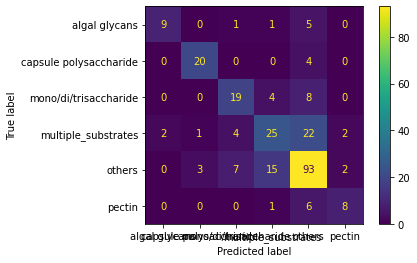

In [125]:
plot_confusion_matrix(search, X_test, y_test) 